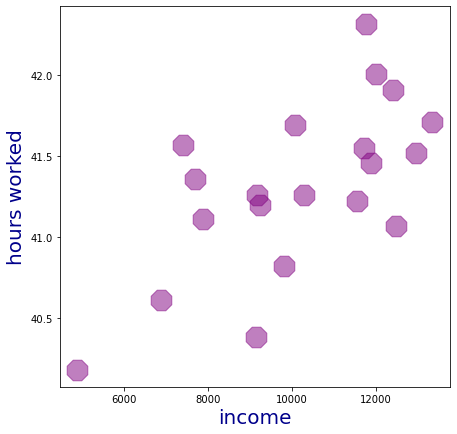

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'income': [9136.81, 11709.94, 12416.79,  4875.73, 10065.03,
                   11755.33, 7401.78, 10291.38, 12002.42, 11878.76,
                   13347.65, 7676.76,  9808.56, 11556.47, 7875.49,
                   12486.19, 9242.40,  6867.09, 12946.25, 9167.36],
       
       'hours_worked': [40.38, 41.55, 41.91, 40.18, 41.69,
                        42.32, 41.57, 41.26, 42.01, 41.46,
                        41.71, 41.36, 40.82, 41.22, 41.11,
                        41.07, 41.20, 40.61, 41.52, 41.26]}

data = pd.DataFrame(data)

# Visualization code
fig = plt.figure(figsize=(7,7))
plt.scatter(data['income'], data['hours_worked'],
           marker='8', s=500, color='purple', alpha=0.5)
plt.xlabel('income', fontsize=20, color='darkblue')
plt.ylabel('hours worked', fontsize=20, color='darkblue')
plt.show()


# Principal Components Analysis (PCA)
### Step 1: Data Standardization

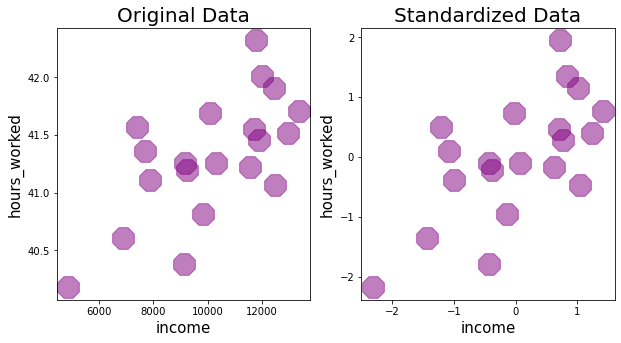

In [3]:
from sklearn.preprocessing import StandardScaler

# Visualization code
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Original Data', fontsize=20)
ax1.scatter(data['income'], data['hours_worked'],
           marker='8', s=550, color='purple', alpha=0.5)
ax1.set_xlabel('income',       fontsize=15)
ax1.set_ylabel('hours_worked', fontsize=15)

# Data Standardization
# ---- ---------------
data = pd.DataFrame(StandardScaler().fit_transform(data),
                   columns=['income','hours_worked'])

# Visualization code
ax2.set_title('Standardized Data', fontsize=20)
ax2.scatter(data['income'], data['hours_worked'],
           marker='8', s=550, color='purple', alpha=0.5)
ax2.set_xlabel('income',       fontsize=15)
ax2.set_ylabel('hours_worked', fontsize=15)

plt.show()



### Step 2: Covariance Matrix 

In [4]:
print(data.cov())


                income  hours_worked
income        1.052632      0.681933
hours_worked  0.681933      1.052632


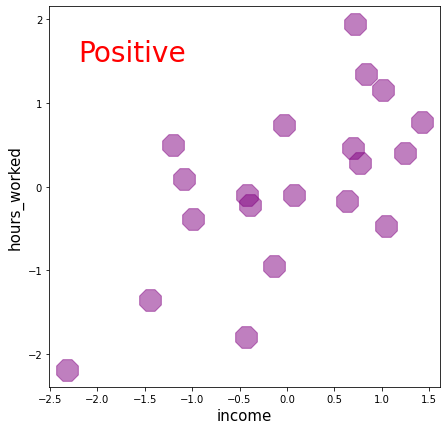

In [6]:
# Visualization code
plt.figure(figsize=(7,7))

plt.scatter(data['income'], data['hours_worked'],
           marker='8', s=550, color='purple', alpha=0.5)
plt.xlabel('income',       fontsize=15)
plt.ylabel('hours_worked', fontsize=15)
plt.text(-2.2, 1.5, 'Positive', fontsize=28, color='red') 
plt.show()


### Step 3: EigenValues and EigenVectors

Eigen Vector Blue:  [-0.70710678  0.70710678] Eigen Values Blue  0.37069821152675975
Eigen Vector Red:   [-0.70710678 -0.70710678] Eigen Values Red  1.7345649463679769


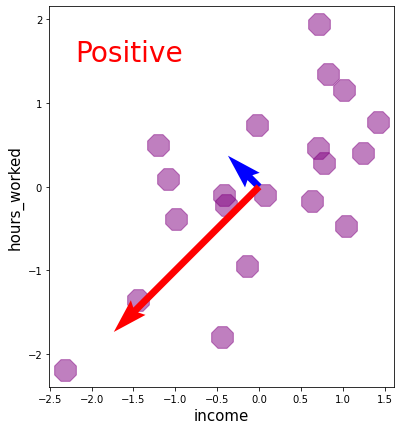

In [10]:
from numpy.linalg import eig

# To calculate eigenvalues and eigenvectors
values, vectors = eig(data.cov())

blue_vector = vectors[:,0]
red_vector  = vectors[:,1]

print('Eigen Vector Blue: ', blue_vector, 'Eigen Values Blue ', values[0])
print('Eigen Vector Red:  ',  red_vector,  'Eigen Values Red ' , values[1])


# Visualization code
plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal')

plt.scatter(data['income'], data['hours_worked'],
           marker='8', s=550, color='purple', alpha=0.5)

# Graph of eigenvectors
plt.quiver(0,0,
          blue_vector[0]/abs(blue_vector[0])*values[0],
          blue_vector[1]/abs(blue_vector[1])*values[0],
          color='blue', angles='xy', scale_units='xy', scale=1, width=0.02)

plt.quiver(0,0,
          red_vector[0]/abs(red_vector[0])*values[1],
          red_vector[1]/abs(red_vector[1])*values[1],
          color='red', angles='xy', scale_units='xy', scale=1, width=0.02)


plt.xlabel('income',       fontsize=15)
plt.ylabel('hours_worked', fontsize=15)
plt.text(-2.2, 1.5, 'Positive', fontsize=28, color='red') 
plt.show()


### Step 4: Data Projection

      income  hours_worked
0   1.579437      0.961667
1  -0.822107      0.168056
2  -1.534522     -0.102653
3   3.183888     -0.096604
4  -0.499323     -0.537054
5  -1.887686     -0.869159
6   0.496655     -1.205324
7   0.017098      0.120812
8  -1.541599     -0.368667
9  -0.751964      0.343694
10 -1.552276      0.461281
11  0.697483     -0.832663
12  0.768752      0.570755
13 -0.323557      0.570704
14  0.976753     -0.429207
15 -0.409228      1.066009
16  0.426776     -0.125011
17  1.974550     -0.061553
18 -1.167425      0.595301
19  0.368295     -0.230384


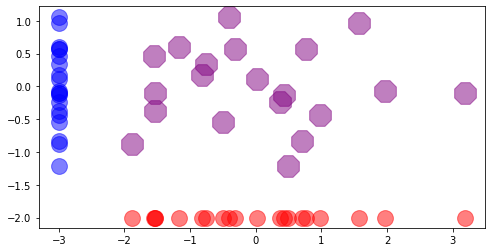

In [12]:
projected = pd.DataFrame(data.values @ vectors.T,
                        columns=['income','hours_worked'])

print(projected)

# Data Visualization
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')

# Rotated Data 
plt.scatter(projected['income'], projected['hours_worked'],
           marker='8', s=550, color='purple', alpha=0.5)

# Projected data to 1 dimension
plt.scatter(projected['income'], [-2]*len(projected['income']),
           s=250, color='red', alpha=0.5)

plt.scatter([-3]*len(projected['hours_worked']), projected['hours_worked'],
           s=250, color='blue', alpha=0.5)

plt.show()




### Step 5: Choosing the best components 

[[ 1.57943678 -0.96166718]
 [-0.82210703 -0.16805609]
 [-1.53452238  0.10265315]
 [ 3.18388796  0.09660367]
 [-0.4993232   0.53705397]
 [-1.88768612  0.86915907]
 [ 0.49665497  1.20532394]
 [ 0.01709831 -0.12081223]
 [-1.54159886  0.36866683]
 [-0.75196373 -0.34369394]
 [-1.55227649 -0.46128129]
 [ 0.697483    0.83266264]
 [ 0.76875225 -0.570755  ]
 [-0.32355705 -0.57070364]
 [ 0.97675315  0.42920737]
 [-0.40922751 -1.06600935]
 [ 0.42677585  0.12501122]
 [ 1.97454995  0.06155337]
 [-1.16742467 -0.59530078]
 [ 0.36829481  0.23038428]]


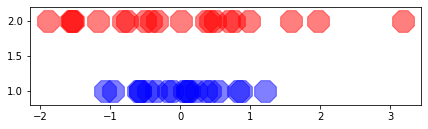

Explained Variance of each component (Red/Blue):           [1.73456495 0.37069821]
Ratio of Explained Variance of each component (Red/Blue):  [0.82391835 0.17608165]


In [18]:
from sklearn.decomposition import PCA

# To get the principal components
pca = PCA()
data = pca.fit_transform(data)
print(data)


# Data Visualization
plt.figure(figsize=(7,7))
plt.axes().set_aspect('equal')

plt.scatter(data[:,0], [2]*data[:,0].size,
           marker='8', s=550, color='red', alpha=0.5)

plt.scatter(data[:,1], [1]*data[:,1].size,
           marker='8', s=550, color='blue', alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()

print('Explained Variance of each component (Red/Blue):          ', pca.explained_variance_)
print('Ratio of Explained Variance of each component (Red/Blue): ', pca.explained_variance_ratio_)
